# Iris Data KNN Project

### Data Load

In [1]:
library(ISLR)

df <- iris
head(df)
str(df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


### Standardize Data

In [2]:
target_col <- which(colnames(df) == 'Species' )
target <- df[, target_col]
data <- df[, -target_col]

standardized.data <- scale(data)
# Check if standardization has been successful
print(var(standardized.data[, 1:2]))

             Sepal.Length Sepal.Width
Sepal.Length    1.0000000  -0.1175698
Sepal.Width    -0.1175698   1.0000000


In [3]:
# Join target and data together
str(standardized.data) #  num [1:150, 1:4], matrix
standardized.data <- as.data.frame(standardized.data)
str(standardized.data) # data.frame':	150 obs

standardized.data$Species <- factor(target)

# Or Simply use standardized.data <- cbind(standardized.data, Species)
# cbind converts the matrix into a dataframe

print(head(standardized.data))

 num [1:150, 1:4] -0.898 -1.139 -1.381 -1.501 -1.018 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 - attr(*, "scaled:center")= Named num [1:4] 5.84 3.06 3.76 1.2
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 - attr(*, "scaled:scale")= Named num [1:4] 0.828 0.436 1.765 0.762
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
'data.frame':	150 obs. of  4 variables:
 $ Sepal.Length: num  -0.898 -1.139 -1.381 -1.501 -1.018 ...
 $ Sepal.Width : num  1.0156 -0.1315 0.3273 0.0979 1.245 ...
 $ Petal.Length: num  -1.34 -1.34 -1.39 -1.28 -1.34 ...
 $ Petal.Width : num  -1.31 -1.31 -1.31 -1.31 -1.31 ...
  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1   -0.8976739  1.01560199    -1.335752   -1.311052  setosa
2   -1.1392005 -0.13153881    -1.335752   -1.311052  setosa
3   -1.3807271  0.32731751    -1.392399   -1.311052

### Train and Test Split

In [4]:
library(caTools)
library(dplyr)
set.seed(101)
split <- sample.split(standardized.data$Species, SplitRatio = 0.7)
train <- subset(standardized.data, split == T)
test <- subset(standardized.data, split == F)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Build KNN Model

In [5]:
# Model with k = 1
library(class)
predicted.target <- knn(train[,-target_col], test[, -target_col], train$Species, k=1)
print(predicted.target)

 [1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor virginica  versicolor versicolor versicolor
[25] versicolor versicolor virginica  versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica


In [6]:
# Misclassification rate
misclass.error <- mean(test$Species != predicted.target)
misclass.error

[1] 0.04444444

### Choosing a K value

In [7]:
error.rate <- NULL
predicted.target <- NULL

for( i in 1:10){
  predicted.target <- knn(train[,-target_col], test[, -target_col], train$Species, k=i)
  error.rate[i] <-mean(test$Species != predicted.target)
}

print(error.rate)

 [1] 0.04444444 0.06666667 0.02222222 0.02222222 0.02222222 0.04444444
 [7] 0.04444444 0.04444444 0.04444444 0.02222222


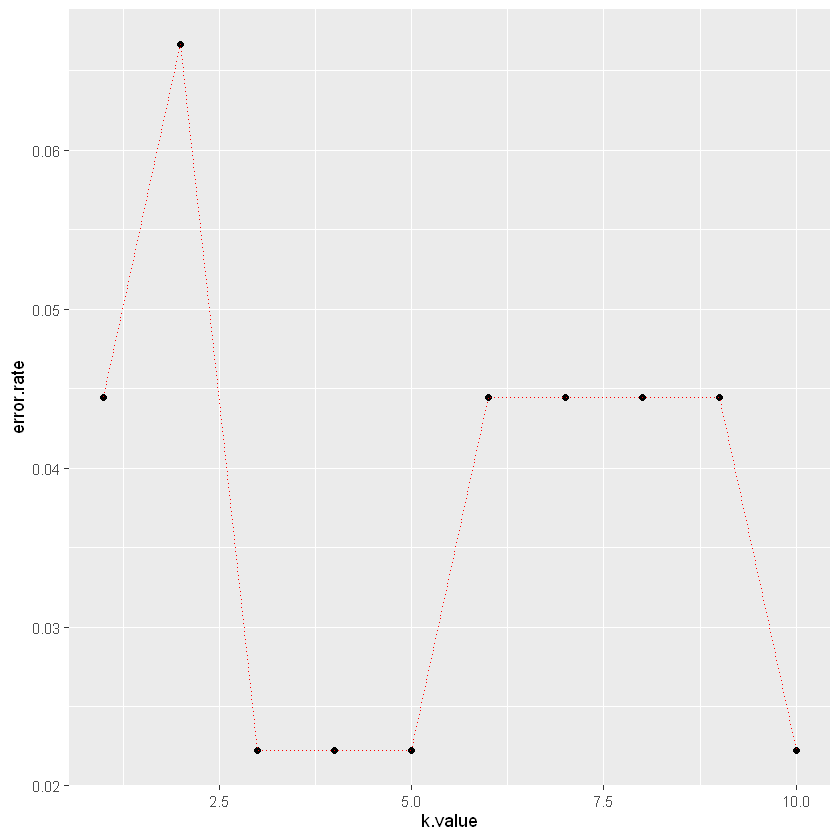

In [8]:
# Scatter plot
library(ggplot2)
k.value <- 1:10
error.df <- data.frame(k.value, error.rate)

pl <- ggplot(error.df, aes(x=k.value, y=error.rate)) + geom_point() + geom_line(lty='dotted',color='red')
print(pl)

##### **Observations from the Graph:**
- The **error rate is highest at K = 2**.
- The **error rate significantly drops around K = 3 and K = 5**.
- There is a **stable error rate** from **K = 5 to K = 9**, but it slightly increases.
- At **K = 10**, the error rate drops again.

##### **Best K Choice:**
- **K = 5** appears to be a strong choice since it has the **lowest error rate**.
- **K = 3** is also a good option, but **K = 5** is generally preferred for better generalization.
- Higher values (K = 6, 7, 8, 9) show a slightly **higher error rate**, which indicates they might not be the optimal choice.

##### **Final Recommendation:**
- **Best K = 5**, as it achieves the lowest error rate while avoiding extreme overfitting (small K) or underfitting (large K).


### Limitation
- Due to dataset's limited size, the prediction error rates fluctuate 
- This is because the smaller the data size is, the more sensitive to k value the prediction is.